In [1]:
from file_cache import *

2020-05-19 16:16:20,367 util_log.py[153] INFO Start the program at:amax7, 127.0.1.1, with:Load module


File_cache: Adjust notebook work fold to:/share/felix/pj/lung_classify/


In [2]:
 
import itertools
import numpy as np
from easydict import EasyDict as edict

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



In [3]:
# from file_cache import *

# df = pd.DataFrame({'path':glob('/share/data2/covid_CCII/**/*.png', recursive=True)})
# df['p_cnt'] = df.path.apply(lambda val: val.split('_')[-2]).astype(int)
# df['class_'] = df.path.apply(lambda val: val.split('/')[-4])

# df['hash'] =  df.path.apply(lambda val: '_'.join(val.split('/')[-4:-1]))
# df['valid'] = False
# df = df.loc[df.class_!='CP']
# df = df.loc[df.p_cnt>=20000]

# df['target'] = df['class_'].astype('category').cat.codes
# df1 = df
# df.valid.value_counts()
# df

In [40]:
from file_cache import *

df = pd.DataFrame({'path':glob('/share/data2/covid_wuhan/Wuhan_*/**/*.png', recursive=True)})

df['p_cnt'] = df.path.apply(lambda val: val.split('_')[-1].split('.')[0]).astype(int)
df['class_'] = df.path.apply(lambda val: 'NCP' if '_COVID' in val else 'Normal')

df['hash'] =  df.path.apply(lambda val:  val.split('.')[-3])

df['test'] = True
df = df.loc[df.class_!='CP']
df = df.loc[df.p_cnt>=20000]
#df = df.loc[df.path.apply(lambda val: val.split('_')[-6][-1] ).astype(int)<=1]
df['src'] = 'wuhan'

df.head()


#df = pd.concat([df1,df2])
df['target'] = df['class_'].astype('category').cat.codes
 
print(df['class_'].value_counts())


df_wuhan = df.copy()
df_wuhan.head()

NCP       115025
Normal     21016
Name: class_, dtype: int64


,path,p_cnt,class_,hash,test,valid,src,target
0,/share/data2/covid_wuhan/Wuhan_Renmin_COVID/RM...,43719,NCP,/share/data2/covid_wuhan/Wuhan_Renmin_COVID/RM...,True,True,wuhan,0
1,/share/data2/covid_wuhan/Wuhan_Renmin_COVID/RM...,36102,NCP,/share/data2/covid_wuhan/Wuhan_Renmin_COVID/RM...,True,True,wuhan,0
2,/share/data2/covid_wuhan/Wuhan_Renmin_COVID/RM...,38652,NCP,/share/data2/covid_wuhan/Wuhan_Renmin_COVID/RM...,True,True,wuhan,0
3,/share/data2/covid_wuhan/Wuhan_Renmin_COVID/RM...,26085,NCP,/share/data2/covid_wuhan/Wuhan_Renmin_COVID/RM...,True,False,wuhan,0
5,/share/data2/covid_wuhan/Wuhan_Renmin_COVID/RM...,43232,NCP,/share/data2/covid_wuhan/Wuhan_Renmin_COVID/RM...,True,False,wuhan,0


In [43]:
from file_cache import *

df = pd.DataFrame({'path':glob('/share/data2/covid_CCII/*/**/*.png', recursive=True)})

df['p_cnt'] = df.path.apply(lambda val: val.split('_')[-2] ).astype(int)
df['class_'] = df.path.apply(lambda val: val.split('/')[-4])
df  = df.loc[df.class_ != 'CP']

df['hash'] =  df.path.apply(lambda val:  val.split('/')[-3])

df['valid'] = True
df = df.loc[df.class_!='CP']
df = df.loc[df.p_cnt>=20000]
# #df = df.loc[df.path.apply(lambda val: val.split('_')[-6][-1] ).astype(int)<=1]
# df['valid'] = df.path.apply(lambda val: val.split('_')[-6][-1] ).astype(int)<=1
# #df2 = df
df['src'] = 'ccii'

print(df['class_'].value_counts())
df_ccii = df.copy()
df.head()


# #df = pd.concat([df1,df2])
# df['target'] = df['class_'].astype('category').cat.codes
# df = df.loc[df.path.str.contains('_Tonji_')]
# df = df.sample(frac=1)
# df.valid.value_counts()

NCP       84629
Normal    45882
Name: class_, dtype: int64


,path,p_cnt,class_,hash,valid,src
1,/share/data2/covid_CCII/Normal/2139/594/0059_4...,43428,Normal,2139,True,ccii
3,/share/data2/covid_CCII/Normal/2139/594/0007_2...,20836,Normal,2139,True,ccii
4,/share/data2/covid_CCII/Normal/2139/594/0061_4...,42240,Normal,2139,True,ccii
6,/share/data2/covid_CCII/Normal/2139/594/0056_4...,48432,Normal,2139,True,ccii
7,/share/data2/covid_CCII/Normal/2139/594/0025_4...,44248,Normal,2139,True,ccii


In [12]:
df.iloc[0,0]

'/share/data2/covid_CCII/Normal/2139/594/0075_17716_20.33.png'

NCP       117166
Normal     58604
Name: class_, dtype: int64

In [5]:

df['valid'].value_counts()


False    40269
True     20629
Name: valid, dtype: int64

In [52]:
from file_cache import *

df = pd.DataFrame({'path':glob('/share/data2/covid_img/v13/images/*/**/*.png', recursive=True)})


def check_type(val):
    if '_normal_' in val:
        return 'Normal'
    elif '_covid_' in val :
        return 'NCP'
#     elif '_pneumonia_' in val:
#         return 'pneumonia'
    else:
        return 'other'

df['valid'] = False
df['class_'] = df.path.apply(lambda val: check_type(val))

df['p_cnt'] = df.path.apply(lambda val: val.split('_')[-1][1:-4] ).astype(int)

df['src'] = 'v13'
df  = df.loc[df.class_ != 'other']

# df['hash'] =  df.path.apply(lambda val:  val.split('/')[-3])

# df['valid'] = True
# df = df.loc[df.class_!='CP']
#df = df.loc[df.p_cnt>=20000]
print(df['class_'].value_counts()) 
 
df_v13 = df.copy()

NCP       354497
Normal    274670
Name: class_, dtype: int64


In [55]:
df = pd.concat([df_v13, df_ccii, df_wuhan])
df.head()

,class_,hash,p_cnt,path,src,target,test,valid
0,NCP,NaN,36558,/share/data2/covid_img/v13/images/lung/9063201...,v13,NaN,NaN,False
1,NCP,NaN,19810,/share/data2/covid_img/v13/images/lung/9063201...,v13,NaN,NaN,False
2,NCP,NaN,23742,/share/data2/covid_img/v13/images/lung/9063201...,v13,NaN,NaN,False
3,NCP,NaN,15198,/share/data2/covid_img/v13/images/lung/9063201...,v13,NaN,NaN,False
4,NCP,NaN,61046,/share/data2/covid_img/v13/images/lung/9063201...,v13,NaN,NaN,False


In [56]:
df.groupby(['src', 'class_']).path.count()

src    class_
ccii   NCP        84629
       Normal     45882
v13    NCP       354497
       Normal    274670
wuhan  NCP       115025
       Normal     21016
Name: path, dtype: int64

In [10]:
# file = df.loc[df.path.str.contains('Tonji_NonCOVID/')].path.sample(frac=1).iloc[0]
# print(file)
# plt.imshow(plt.imread(file))
# plt.show()
# plt.hist(cv2.imread(file).flatten(),bins=100 )
# pass

In [11]:
# file = df.loc[df.path.str.contains('Tonji_COVID/')].path.sample(frac=1).iloc[0]
# print(file)
# plt.imshow(plt.imread(file))
# plt.show()
# plt.hist(cv2.imread(file).flatten(),bins=100 )
# pass

In [12]:
# file = df.loc[df.valid==True].path.sample(frac=1).iloc[0] 
# print(file)
# plt.imshow(plt.imread(file))
# plt.show()
# plt.hist(cv2.imread(file).flatten(),bins=100 )
# pass

In [13]:
df.class_.value_counts()

NCP       39882
Normal    21016
Name: class_, dtype: int64

In [14]:
# df_yqh = pd.read_csv('/share/data2/yqh/COVID_v4.0/data_new/COVID_cls2.csv')
# df_yqh.subset.value_counts()

# #'people_idx', 'hash_id', 'img_dir', 'label', 'label_name', 'subset'
# df_yqh['path'] = df_yqh.img_dir
# df_yqh = df_yqh.loc[df_yqh.subset!='test']
# print(df_yqh.subset.value_counts())
# df_yqh['valid'] = df_yqh.subset == 'valid' 
# df_yqh['target'] = df_yqh['label']

# print(df_yqh.valid.value_counts())

You can deactivate this warning by passing `no_check=True`.


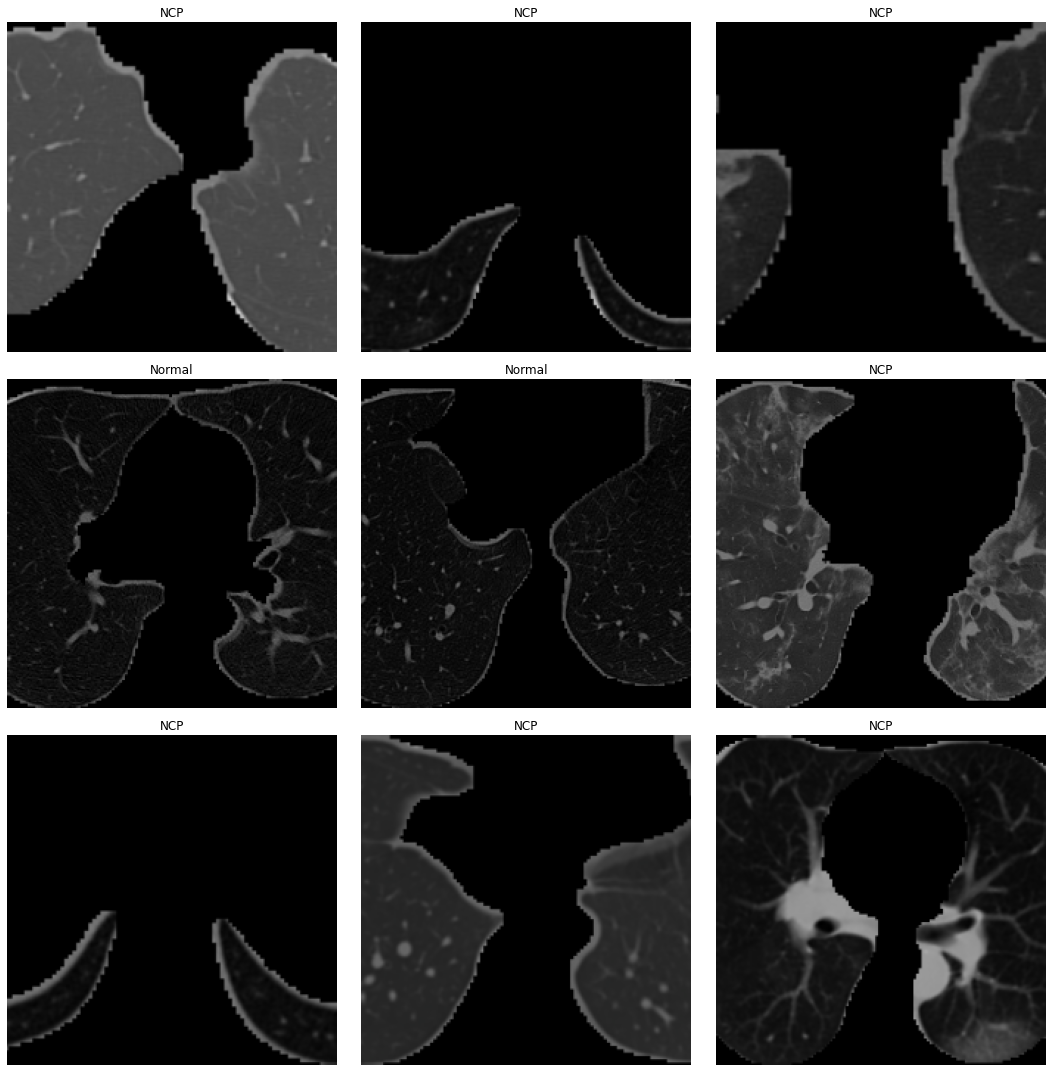

In [77]:
# df = pd.read_csv(path/'cleaned.csv', header='infer')
# print(df.head())

#https://gilberttanner.com/blog/fastai-image-classification


%reload_ext autoreload
%autoreload 2
from fastai import *
from fastai.vision import *
from fastai.widgets import *
# df = pd.read_csv('./input/train.csv', names=['file_name', 'label'])
# df['fold'] = df.file_name%5
# df['file_name'] = df.file_name.astype('str')+'.jpg'

# print(df.head(), df.shape)
# #df.label = np.where(df.label>=1, 1, 0)


# print(df.label.value_counts().sort_index())

# print(df.shape)
# tfms = get_transforms(do_flip=False)

#valid_fold = 4
df_train_valid = pd.concat([df_ccii, df_v13])[['path', 'valid', 'class_']]
data = (ImageDataBunch.from_df(df=df_train_valid, fn_col='path', path='/', valid_pct=0)
                    #.split_by_rand_pct(0.2)
                    .split_from_df(col='valid')
                   .label_from_df('class_')
                   .transform(None, size=224)
                   .databunch(bs=64)).normalize(imagenet_stats)

test_data = (ItemList.from_df(df=df_wuhan, cols='path', path='/'  )
#             .split_none()
#             .label_from_df('class_')
            )
data.add_test(test_data)

data.show_batch(rows=3, figsize=(15,15))


In [78]:
df_train_valid

,path,valid,class_
1,/share/data2/covid_CCII/Normal/2139/594/0059_4...,True,Normal
3,/share/data2/covid_CCII/Normal/2139/594/0007_2...,True,Normal
4,/share/data2/covid_CCII/Normal/2139/594/0061_4...,True,Normal
6,/share/data2/covid_CCII/Normal/2139/594/0056_4...,True,Normal
7,/share/data2/covid_CCII/Normal/2139/594/0025_4...,True,Normal
...,...,...,...
780134,/share/data2/covid_img/v13/images/hos3/2002170...,False,NCP
780135,/share/data2/covid_img/v13/images/hos3/2002170...,False,NCP
780136,/share/data2/covid_img/v13/images/hos3/2002170...,False,NCP
780137,/share/data2/covid_img/v13/images/hos3/2002170...,False,NCP


In [16]:
#get_transforms?

In [17]:
# df_yqh = pd.read_csv('/share/data2/yqh/COVID_v4.0/data_new/COVID_cls2.csv')
# df_yqh.subset.value_counts()

# #'people_idx', 'hash_id', 'img_dir', 'label', 'label_name', 'subset'
# df_yqh['path'] = df_yqh.img_dir
# df_yqh = df_yqh.loc[df_yqh.subset=='test']
# df_yqh['target'] = df_yqh['label']

# test_data = ImageList.from_df(df=df_yqh, cols='path', path='/') 
# data.add_test(test_data)

In [79]:
len(data.train_ds), len(data.valid_ds),# len(data.test_ds)

(629167, 130511)

In [19]:
tmp = iter(data.valid_ds)

In [112]:
# def convid_model(*args, **kwargs):
#     return CovidNet(n_classes=2)

# #cnn_learner(data, convid_model, metrics=[accuracy])
# covid_learn = Learner(data, convid_model(), metrics=[accuracy])
# covid_learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.685864,0.664068,0.648443,1:03:33
1,0.683106,0.660861,0.648443,1:16:08
2,0.685711,0.663680,0.648443,55:39
3,0.680528,0.661607,0.648443,55:58
4,0.686810,0.663236,0.648443,55:17


In [81]:
#del learn
learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit_one_cycle(5)


epoch,train_loss,valid_loss,accuracy,time
0,0.088985,0.988805,0.668357,30:44
1,0.048305,2.205286,0.643601,30:46
2,0.029866,1.715853,0.664166,30:46
3,0.021322,2.301945,0.664818,30:48
4,0.014205,2.249380,0.673093,30:48


In [85]:
df.loc[df.src=='ccii'].class_.value_counts()

NCP       84629
Normal    45882
Name: class_, dtype: int64

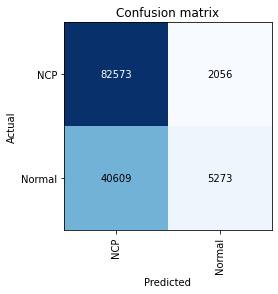

In [83]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [87]:
res_model = learn.get_preds(ds_type=DatasetType.Valid)
res = res_model[0].numpy()

In [95]:
res_df = pd.DataFrame({'res':res[:,1], 'path':learn.data.valid_dl.items})
res_df['path'] = res_df['path'].str[2:]
# res_df['class_'] = res_df.path.apply(lambda val: 'NCP' if '_COVID' in val else 'Normal')
# res_df['target'] = res_df['class_'].astype('category').cat.codes
# res_df['hash'] =  res_df.path.apply(lambda val:  val.split('.')[-3])

res_df = pd.merge(res_df, df, on='path')
res_df['target'] = res_df['class_'].astype('category').cat.codes
res_df

,res,path,class_,hash,p_cnt,src,target,test,valid
0,5.150697e-01,/share/data2/covid_CCII/Normal/2139/594/0059_4...,Normal,2139,43428,ccii,1,NaN,True
1,6.218345e-04,/share/data2/covid_CCII/Normal/2139/594/0007_2...,Normal,2139,20836,ccii,1,NaN,True
2,1.310730e-03,/share/data2/covid_CCII/Normal/2139/594/0061_4...,Normal,2139,42240,ccii,1,NaN,True
3,1.757287e-01,/share/data2/covid_CCII/Normal/2139/594/0056_4...,Normal,2139,48432,ccii,1,NaN,True
4,7.982842e-01,/share/data2/covid_CCII/Normal/2139/594/0025_4...,Normal,2139,44248,ccii,1,NaN,True
...,...,...,...,...,...,...,...,...,...
130506,2.900077e-05,/share/data2/covid_CCII/NCP/888/2426/0050_5267...,NCP,888,52672,ccii,0,NaN,True
130507,2.367403e-07,/share/data2/covid_CCII/NCP/888/2426/0022_4761...,NCP,888,47610,ccii,0,NaN,True
130508,3.941522e-03,/share/data2/covid_CCII/NCP/888/2426/0001_5537...,NCP,888,55378,ccii,0,NaN,True
130509,3.453205e-05,/share/data2/covid_CCII/NCP/888/2426/0006_2112...,NCP,888,21128,ccii,0,NaN,True


In [96]:
sum(np.round(res_df.res)==res_df.target)/len(res_df)


0.6730926895050992

In [91]:
np.round(res_df.res)

0         1.0
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
130506    0.0
130507    0.0
130508    0.0
130509    0.0
130510    0.0
Name: res, Length: 130511, dtype: float32

In [97]:

i= 0.5
res_df['rank_'] = res_df.groupby('hash').res.rank(method='first', ascending=False)
#res_df_mini = res_df.loc[res_df.rank_<=40]
res_df_mini = res_df.copy()
res_df_mini.sort_values(['hash', 'rank_'])
#res_df_mini = res_df_mini.loc[res_df_mini.class_!='NCP']
tmp = res_df_mini.groupby('hash').agg({'res':['max', 'mean', 'min', 'sum', 'count'],'target':['max' ],  })

tmp.columns=['_'.join(a) for a in tmp.columns]
tmp['res_mean_round'] = np.where(tmp.res_mean>i, 1, 0)
tmp['res_max_round'] =  np.where(tmp.res_max>i, 1, 0)  

tmp.sort_values('res_mean')
tmp['path'] = tmp.index
tmp['class'] = tmp.path.apply(lambda val: 'NCP' if '_COVID' in val else 'Normal')
tmp['res_sum_ex'] = tmp.res_sum/tmp.res_count

xx = sum(tmp.res_mean_round == tmp.target_max )/len(tmp)
xx

2020-05-27 14:06:42,531 utils.py[129] INFO Note: NumExpr detected 48 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2020-05-27 14:06:42,533 utils.py[141] INFO NumExpr defaulting to 8 threads.


0.5372233400402414

In [98]:
tmp.target_max.value_counts()

0    800
1    691
Name: target_max, dtype: int64

In [100]:
from sklearn.metrics import confusion_matrix
a = confusion_matrix(tmp.target_max, tmp.res_mean_round )
a

array([[795,   5],
       [685,   6]])

In [29]:
a.diagonal()/a.sum(1)

array([0.923077, 1.      ])

In [30]:
# res_df.shape, yqh.shape

In [31]:
# yqh = pd.read_csv('/share/data2/yqh/COVID_v3.0/tongji/results.csv')
# yqh.shape

In [32]:
# yqh = pd.read_csv('/share/data2/yqh/COVID_v4.0/data_new/COVID_cls2.csv')
# yqh.subset.value_counts()